In [1]:
import pandas as pd
import numpy as np
import os
import re
import networkx as nx

import matplotlib.pyplot as plt

In [2]:
path_root = '/Users/matthieudelafourniere/Documents/Telecom/MVA/ALTEGRAD/Data Challenge'
path_to_data = path_root + '/data/'

## Analysis of input graphs data

In [3]:
def natural_keys(text):
    return [atoi(c) for c in re.split('(\d+)', text)]

def atoi(text):
    return int(text) if text.isdigit() else text

edgelists = os.listdir(path_to_data + 'edge_lists/')
# important to maintain alignment with the targets!
edgelists.sort(key=natural_keys)

In [4]:
histograms = []
densities = []
n_nodes = []
n_edges = []
for idx, edgelist in enumerate(edgelists):
    g = nx.read_edgelist(path_to_data + 'edge_lists/' + edgelist)
    histograms.append(nx.degree_histogram(g))
    densities.append(nx.density(g))
    n_nodes.append(len(g.nodes))
    n_edges.append(len(g.edges))
    if idx % round(len(edgelists)/10) == 0:
        print(idx)

0
9372
18744
28116
37488
46860
56232
65604
74976
84348


Text(0.5, 1.0, 'Number of edges by graph distribution')

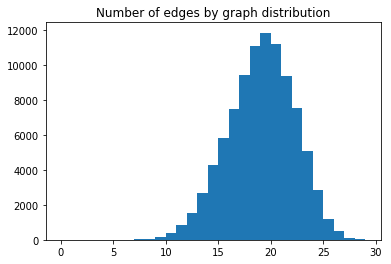

In [12]:
plt.hist(n_edges, bins=np.arange(0, 30))
plt.title("Number of edges by graph distribution")

Text(0.5, 1.0, 'Number of nodes by graph distribution')

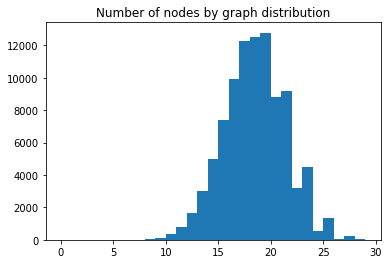

In [14]:
plt.hist(n_nodes, bins=np.arange(0, 30))
plt.title("Number of nodes by graph distribution")

Text(0.5, 1.0, 'Graphs densities distribution')

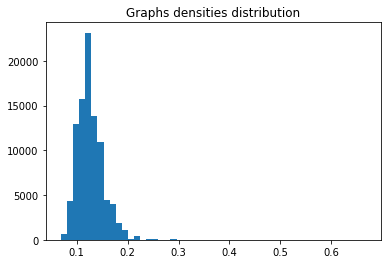

In [18]:
plt.hist(densities, bins=50)
plt.title("Graphs densities distribution")

In [19]:
degree_df = pd.DataFrame(histograms)

Text(0.5, 1.0, 'Degree distribution across the nodes of all graphs')

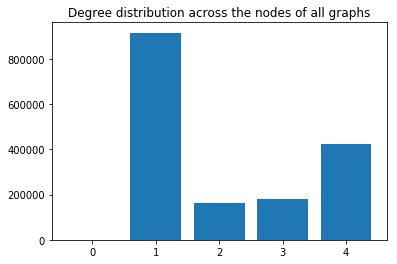

In [20]:
plt.bar([i for i in range(5)], degree_df.sum())
plt.title('Degree distribution across the nodes of all graphs')

In [23]:
average_degree_of_graph

array([4. , 4.6, 4.2, ..., 4.4, 4.6, 3. ])

## Analysis of target data

In [5]:
df_target = pd.DataFrame()

In [6]:
for tgt in range(4):
    with open(path_to_data + 'targets/train/target_' + str(tgt) + '.txt', 'r') as file:
        target = file.read().splitlines()
    df_target[tgt] = pd.to_numeric(target)

In [7]:
for i in range(4):
    df_target[i] = pd.to_numeric(df_target[i])

In [8]:
df_target.mean()

0   -0.000105
1    0.001529
2   -0.001883
3   -0.005767
dtype: float64

Text(0.5, 1.0, 'Distribution of target 0 values')

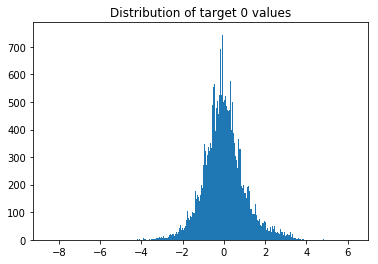

In [10]:
plt.hist(df_target[0], bins=1000)
plt.title('Distribution of target 0 values')

Text(0.5, 1.0, 'Distribution of target 1 values')

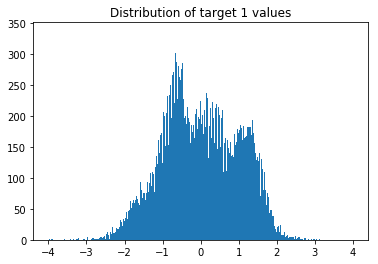

In [15]:
plt.hist(df_target[1], bins=1000, range=(-4,4))
plt.title('Distribution of target 1 values')

Text(0.5, 1.0, 'Distribution of target 2 values')

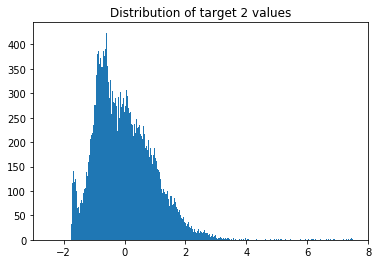

In [17]:
plt.hist(df_target[2], bins=1000, range=(-2.5, 7.5))
plt.title('Distribution of target 2 values')

Text(0.5, 1.0, 'Distribution of target 3')

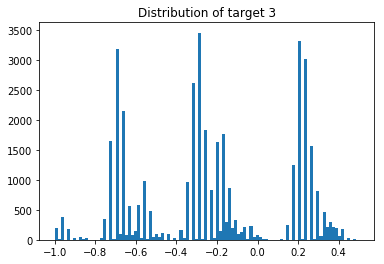

In [24]:
plt.hist(df_target[3], bins=100, range=(-1,.5))
#plt.hist(df_target[3], bins=30)
plt.title('Distribution of target 3')

In [25]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

X = np.array(df_target[2]).reshape(-1, 1)
Y = np.array(df_target[3]).reshape(-1, 1)

regr.fit(X, Y)
Y_pred = regr.predict(X)
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [[-0.27065582]]


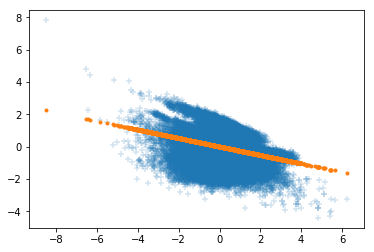

In [339]:
plt.scatter(X, Y, marker='+', alpha=.2)
plt.scatter(X, Y_pred, marker='.')

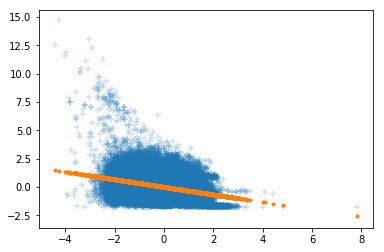

In [341]:
plt.scatter(X, Y, marker='+', alpha=.2)
plt.scatter(X, Y_pred, marker='.')

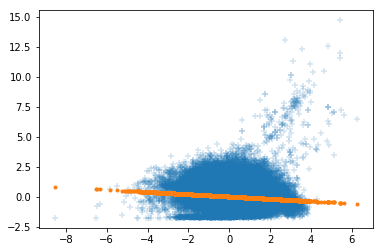

In [343]:
plt.scatter(X, Y, marker='+', alpha=.2)
plt.scatter(X, Y_pred, marker='.')

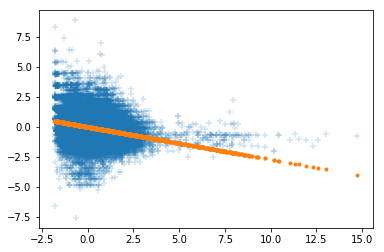

In [349]:
plt.scatter(X, Y, marker='+', alpha=.2)
plt.scatter(X, Y_pred, marker='.')

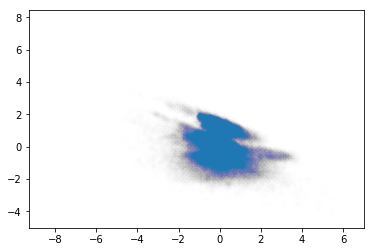

In [357]:
plt.scatter(df_target[0], df_target[1], marker='+', alpha=.002)

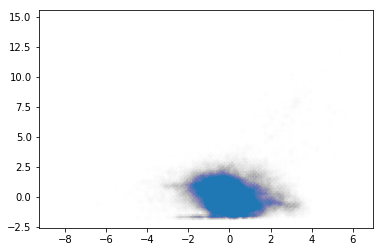

In [358]:
plt.scatter(df_target[0], df_target[2], marker='+', alpha=.002)

In [28]:
plt.scatter?

Text(0.5, 1.0, 'Distribution map (target_0, target_3) for training data')

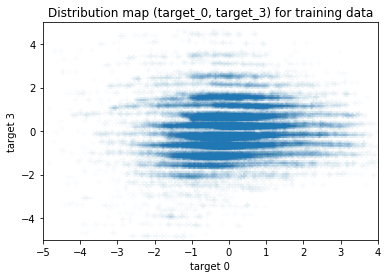

In [36]:
plt.scatter(df_target[0], df_target[3], marker='+', alpha=.02)
plt.xlabel("target 0")
plt.ylabel("target 3")
plt.xlim(-5, 4)
plt.ylim(-5, 5)
plt.title("Distribution map (target_0, target_3) for training data")

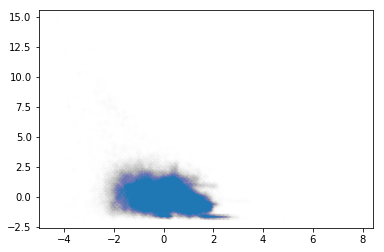

In [360]:
plt.scatter(df_target[1], df_target[2], marker='+', alpha=.002)

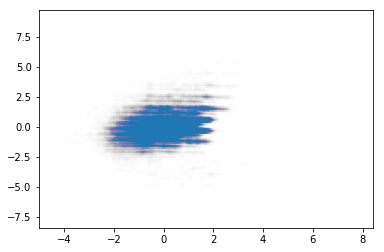

In [361]:
plt.scatter(df_target[1], df_target[3], marker='+', alpha=.002)

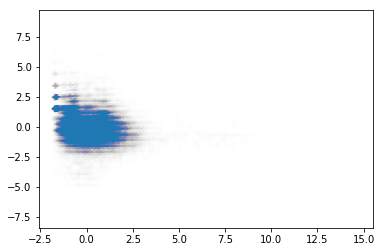

In [362]:
plt.scatter(df_target[2], df_target[3], marker='+', alpha=.002)

In [298]:
plt.scatter?

# Analysis of grid search

In [6]:
dfgrid = pd.read_csv(path_to_data + 'cv_results_target_3_v2.csv', index_col=0)

In [8]:
dfgrid

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_batch_size,param_drop_rate,param_epochs,param_my_optimizer,param_n_units_doc,param_n_units_sentence,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,296.158677,11.126420,-1.530342,-1.532516,16,0.3,5,nadam,10,10,"{'batch_size': 16, 'drop_rate': 0.3, 'epochs':...",8,-1.541279,-1.568629,-1.519405,-1.496404,3.594057,0.020375,0.010937,0.036112
1,371.062033,14.529259,-1.596579,-1.596548,16,0.3,5,nadam,10,50,"{'batch_size': 16, 'drop_rate': 0.3, 'epochs':...",13,-2.308262,-2.327982,-0.884896,-0.865115,1.460696,0.153260,0.711683,0.731434
2,313.033582,11.996211,-0.826341,-0.826713,16,0.3,5,nadam,50,10,"{'batch_size': 16, 'drop_rate': 0.3, 'epochs':...",2,-0.631950,-0.651153,-1.020732,-1.002272,2.007393,0.025401,0.194391,0.175559
3,352.484076,14.226993,-1.624066,-1.617494,16,0.3,5,nadam,50,50,"{'batch_size': 16, 'drop_rate': 0.3, 'epochs':...",14,-0.889394,-0.909149,-2.358738,-2.325839,4.134795,0.077053,0.734672,0.708345
4,360.803246,11.325205,-2.123048,-2.121997,16,0.3,10,nadam,10,10,"{'batch_size': 16, 'drop_rate': 0.3, 'epochs':...",23,-3.576776,-3.599570,-0.669321,-0.644424,3.094050,0.009589,1.453727,1.477573
5,533.518702,15.655477,-1.175774,-1.193617,16,0.3,10,nadam,10,50,"{'batch_size': 16, 'drop_rate': 0.3, 'epochs':...",3,-1.860010,-1.904079,-0.491538,-0.483155,223.319988,0.261459,0.684236,0.710462
6,413.041381,12.203432,-3.139995,-3.109157,16,0.3,10,nadam,50,10,"{'batch_size': 16, 'drop_rate': 0.3, 'epochs':...",35,-1.601064,-1.618440,-4.678925,-4.599874,151.604226,0.008309,1.538931,1.490717
7,406.274232,14.587855,-1.316223,-1.306629,16,0.3,10,nadam,50,50,"{'batch_size': 16, 'drop_rate': 0.3, 'epochs':...",5,-1.634087,-1.634272,-0.998359,-0.978987,106.660282,0.234138,0.317864,0.327642
8,314.483362,11.527529,-2.908204,-2.905555,16,0.5,5,nadam,10,10,"{'batch_size': 16, 'drop_rate': 0.5, 'epochs':...",32,-2.303982,-2.358526,-3.512427,-3.452585,0.075235,0.108438,0.604222,0.547030
9,362.467581,16.232524,-4.883810,-4.862880,16,0.5,5,nadam,10,50,"{'batch_size': 16, 'drop_rate': 0.5, 'epochs':...",42,-4.838930,-4.923787,-4.928689,-4.801972,36.795582,0.035682,0.044879,0.060908


In [9]:
by_droprate = dfgrid.groupby('param_drop_rate').mean()
by_batch_size = dfgrid.groupby('param_batch_size').mean()
by_epochs = dfgrid.groupby('param_epochs').mean()
by_nunits_doc = dfgrid.groupby('param_n_units_doc').mean()
by_nunits_sentence = dfgrid.groupby('param_n_units_sentence').mean()

In [11]:
columns = ['rank_test_score', 'mean_test_score', 'mean_train_score']

In [12]:
by_droprate[columns]

,rank_test_score,mean_test_score,mean_train_score
param_drop_rate,,,
0.3,15.208333,-1.812572,-1.812011
0.5,33.791667,-3.850732,-3.849946


In [13]:
by_batch_size[columns]

,rank_test_score,mean_test_score,mean_train_score
param_batch_size,,,
16,27.2500,-3.583584,-3.581398
96,27.0625,-2.921447,-2.924244
256,19.1875,-1.989924,-1.987294


In [14]:
by_epochs[columns]

,rank_test_score,mean_test_score,mean_train_score
param_epochs,,,
5,23.083333,-2.671679,-2.668473
10,25.916667,-2.991625,-2.993484


In [15]:
by_nunits_doc[columns]

,rank_test_score,mean_test_score,mean_train_score
param_n_units_doc,,,
10,27.0,-3.028599,-3.026400
50,22.0,-2.634705,-2.635557


In [16]:
by_nunits_sentence[columns]

,rank_test_score,mean_test_score,mean_train_score
param_n_units_sentence,,,
10,26.541667,-2.978958,-2.973245
50,22.458333,-2.684346,-2.688712


In [23]:
columns_w_params = columns + ['param_drop_rate', 'param_batch_size', 'param_epochs', 'param_n_units_doc', 'param_n_units_sentence']



In [24]:
dfgrid.sort_values('rank_test_score')[columns_w_params]

,rank_test_score,mean_test_score,mean_train_score,param_drop_rate,param_batch_size,param_epochs,param_n_units_doc,param_n_units_sentence
34,1,-0.817119,-0.820413,0.3,256,5,50,10
2,2,-0.826341,-0.826713,0.3,16,5,50,10
5,3,-1.175774,-1.193617,0.3,16,10,10,50
39,4,-1.292931,-1.285074,0.3,256,10,50,50
7,5,-1.316223,-1.306629,0.3,16,10,50,50
17,6,-1.365876,-1.371943,0.3,96,5,10,50
38,7,-1.383802,-1.402330,0.3,256,10,50,10
0,8,-1.530342,-1.532516,0.3,16,5,10,10
23,9,-1.532028,-1.533037,0.3,96,10,50,50
19,10,-1.565341,-1.572410,0.3,96,5,50,50


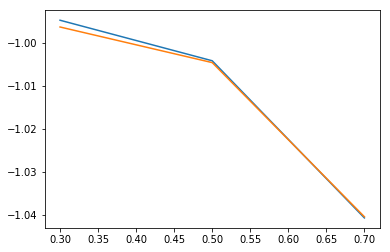

In [48]:
plt.plot(by_droprate.index, by_droprate["mean_test_score"])
plt.plot(by_droprate.index, by_droprate["mean_train_score"])

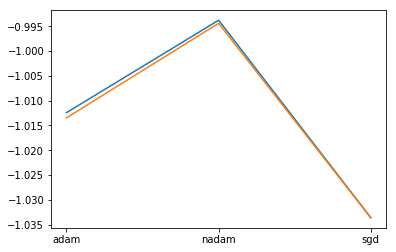

In [49]:
plt.plot(by_optimizer.index, by_optimizer["mean_test_score"])
plt.plot(by_optimizer.index, by_optimizer["mean_train_score"])

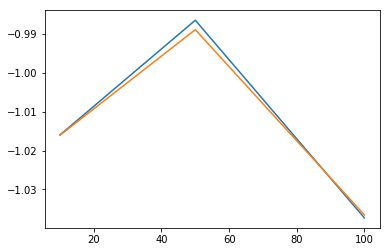

In [50]:
plt.plot(by_nunits.index, by_nunits["mean_test_score"])
plt.plot(by_nunits.index, by_nunits["mean_train_score"])

In [63]:
by_droprate

,Unnamed: 0,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_n_units,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
param_drop_rate,,,,,,,,,,,,,,,,,
0.3,4.0,45.254901,1.166882,-0.994825,-0.996394,53.333333,11.777778,-0.968150,-0.987761,-0.982841,-1.022845,-1.033506,-0.978576,1.907743,0.014362,0.035842,0.025551
0.5,13.0,74.531111,1.244266,-1.004234,-1.004661,53.333333,12.333333,-0.962989,-0.980830,-1.002701,-1.041363,-1.047038,-0.991791,0.995458,0.009405,0.056374,0.045756
0.7,22.0,105.226014,1.301110,-1.040720,-1.040445,53.333333,17.888889,-1.050734,-1.064558,-0.998960,-1.039633,-1.072484,-1.017142,1.905508,0.007793,0.047167,0.038109


In [72]:
dfgrid.loc[4]

Unnamed: 0                                                            4
mean_fit_time                                                   43.2459
mean_score_time                                                 1.04791
mean_test_score                                               -0.865317
mean_train_score                                              -0.870502
param_drop_rate                                                     0.3
param_my_optimizer                                                nadam
param_n_units                                                        50
params                {'drop_rate': 0.3, 'my_optimizer': 'nadam', 'n...
rank_test_score                                                       1
split0_test_score                                             -0.799328
split0_train_score                                            -0.807854
split1_test_score                                             -0.933908
split1_train_score                                            -0

In [69]:
dfgrid.loc[23]

Unnamed: 0                                                           23
mean_fit_time                                                   125.019
mean_score_time                                                 1.66567
mean_test_score                                                -1.16733
mean_train_score                                               -1.16528
param_drop_rate                                                     0.7
param_my_optimizer                                                nadam
param_n_units                                                       100
params                {'drop_rate': 0.7, 'my_optimizer': 'nadam', 'n...
rank_test_score                                                      27
split0_test_score                                              -1.18148
split0_train_score                                             -1.18993
split1_test_score                                              -0.99926
split1_train_score                                             -

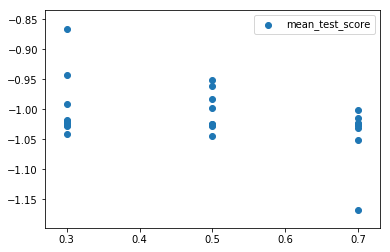

In [67]:
plt.scatter(dfgrid['param_drop_rate'], dfgrid['mean_test_score'])
plt.legend()

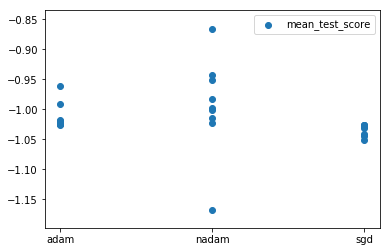

In [73]:
plt.scatter(dfgrid['param_my_optimizer'], dfgrid['mean_test_score'])
plt.legend()

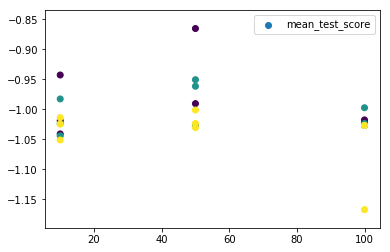

In [77]:
plt.scatter(dfgrid['param_n_units'], dfgrid['mean_test_score'], c=dfgrid['param_drop_rate']*10)
plt.legend()

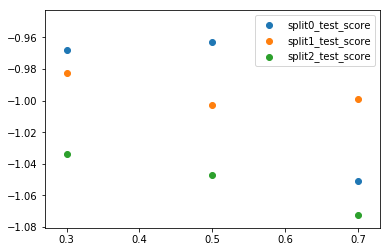

In [64]:
plt.scatter(by_droprate.index, by_droprate['split0_test_score'])
plt.scatter(by_droprate.index, by_droprate['split1_test_score'])
plt.scatter(by_droprate.index, by_droprate['split2_test_score'])
plt.legend()

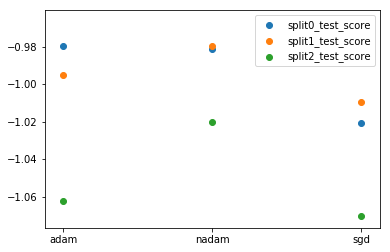

In [65]:
plt.scatter(by_optimizer.index, by_optimizer['split0_test_score'])
plt.scatter(by_optimizer.index, by_optimizer['split1_test_score'])
plt.scatter(by_optimizer.index, by_optimizer['split2_test_score'])
plt.legend()

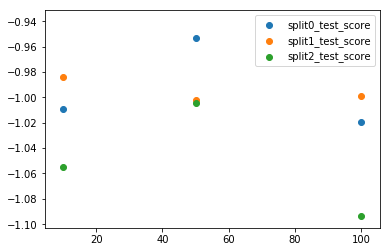

In [66]:
plt.scatter(by_nunits.index, by_nunits['split0_test_score'])
plt.scatter(by_nunits.index, by_nunits['split1_test_score'])
plt.scatter(by_nunits.index, by_nunits['split2_test_score'])
plt.legend()

In [107]:
test_idxs = pd.read_csv(path_to_data + 'test_idxs.txt', header=None)
test_idxs.head()

,0
0,2
1,10
2,11
3,13
4,21


## Analyse de nos prédictions

In [46]:
oldpreds = pd.read_csv(path_to_data + 'predictions_han_sigmoid.txt', index_col=0)
preds = pd.read_csv(path_to_data + 'predictions_han_best.txt', index_col=0)

In [47]:
dfoldpreds = pd.DataFrame(oldpreds.to_numpy().reshape(-1, 18744).T)
dfpreds = pd.DataFrame(preds.to_numpy().reshape(-1, 18744).T)

In [48]:
dfpreds.head()

,0,1,2,3
0,0.101803,0.202370,-1.578080,1.731080
1,-0.021559,-0.744434,0.168826,0.893525
2,0.327020,0.526729,0.872030,1.543005
3,-0.672936,0.535344,0.968076,1.121321
4,0.609045,-0.303473,-0.748201,0.591355


In [49]:
dfoldpreds.head()

,0,1,2,3
0,0.286075,0.000484,0.000233,0.995835
1,0.000487,0.000135,0.001933,0.980770
2,0.097471,0.178685,0.798347,0.994938
3,0.000289,0.482182,0.948032,0.993374
4,0.572147,0.000102,0.000241,0.965987


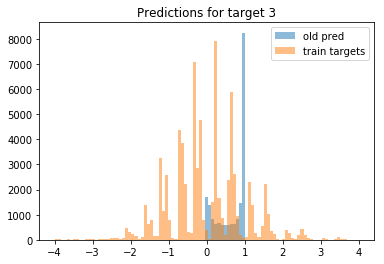

In [57]:
bins = np.linspace(-4, 4, 100)

target = 3
#plt.hist(dfpreds[target].values, bins=bins, alpha=.5, label="predicted targets")
plt.hist(dfoldpreds[target].values, bins=bins, alpha=.5, label="old pred")

plt.hist(df_target[target].values, bins=bins, alpha=.5, label="train targets")
plt.legend()
plt.title("Predictions for target "+str(target))
plt.show()

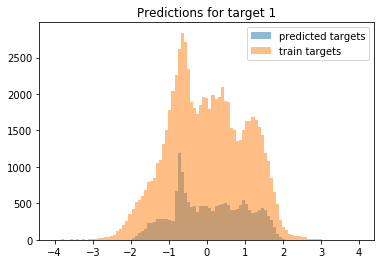

In [196]:
bins = numpy.linspace(-4, 4, 100)

target = 1
plt.hist(dfpreds[target].values, bins=bins, alpha=.5, label="predicted targets")
#plt.hist(dfoldpreds[0].values, bins=bins, alpha=.5, label="old pred")
#
plt.hist(df_target[target].values, bins=bins, alpha=.5, label="train targets")
plt.legend()
plt.title("Predictions for target "+str(target))
plt.show()

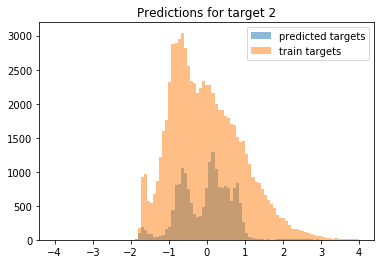

In [197]:
bins = numpy.linspace(-4, 4, 100)

target = 2
plt.hist(dfpreds[target].values, bins=bins, alpha=.5, label="predicted targets")
#plt.hist(dfoldpreds[0].values, bins=bins, alpha=.5, label="old pred")
#
plt.hist(df_target[target].values, bins=bins, alpha=.5, label="train targets")
plt.legend()
plt.title("Predictions for target "+str(target))
plt.show()

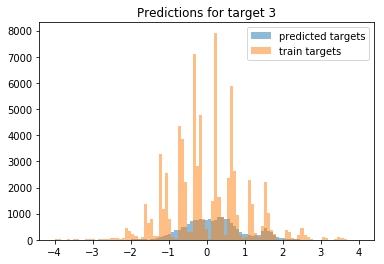

In [198]:
bins = numpy.linspace(-4, 4, 100)

target = 3
plt.hist(dfpreds[target].values, bins=bins, alpha=.5, label="predicted targets")
#plt.hist(dfoldpreds[0].values, bins=bins, alpha=.5, label="old pred")
#
plt.hist(df_target[target].values, bins=bins, alpha=.5, label="train targets")
plt.legend()
plt.title("Predictions for target "+str(target))
plt.show()